<a href="https://colab.research.google.com/github/fatoumahaidara/Computer-vision-coursework-/blob/main/Computer_vision_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Research and Data exploration:
The Bone Fracture Detection: Computer Vision Project collection includes 4,148 X-rays of various upper-arm sections, such as the wrist, elbow, fingers, forearm, humerus and shoulder. Elbow Positive, Fingers Positive, Forearm Fracture, Humerus Fracture, Shoulder Fracture, Wrist Positive, and one more unidentified class are among its seven fracture classes.
Three subsets comprise the dataset: 3,631 images for training, 348 for validation, and 169 for testing. Every image has a label indicating the type of fracture, and some include bounding boxes that indicate where the fracture is. Certain classes (such as wrist fractures) have fewer samples in the dataset due to its imbalance. It works well for jobs like fracture detection and classification, albeit imbalance may require augmentation or class weighting.

According to (MEENA, T. and ROY and S., 2022) , Numerous musculoskeletal disorders (MC) can be caused by common bone disease.   Musculoskeletal disorders affect an estimated 1.71 billion people globally. In addition to musculoskeletal fractures, femoral neck injuries, knee osteoarthritis, and fractures are among the most prevalent bone illnesses; in the next thirty years, the rate is predicted to quadruple. Thus, it is essential to diagnose and treat a fractured patient correctly and promptly. These days, deep learning (DL) and artificial intelligence (AI) are attracting a lot of attention to help radiologists detect bone fractures.

According to (D. P. YADAV and S. RATHOR, 2020) , In the past, methods for identifying and categorising bone fractures have been established. ANN (Artificial Neural Network) has been utilised by Dimililer and Kamil to categorise fractured bones. Enhancement of Data: The size of the data collection is a crucial factor in a deep learning approach. Overfitting may occur if the size of the data collection is tiny.
The data augmentation technique is used to expand the size of the data collection in order to solve this issue. The ImageDataGenerator method for image augmentation is provided by the Keras module.


The goal of this research is to create and assess a convolutional neural network (CNN) that can use X-ray pictures to differentiate between fractured and non-fractured bones. The goal is to assist medical practitioners in precisely identifying bone fractures by utilising deep learning techniques, such as transfer learning, data augmentation, and sophisticated CNN architectures. Additionally, using suitable assessment metrics including accuracy, F1-score, and the area under the receiver operating characteristic curve (AUC), this study will evaluate the model's performance and interpretability.



#1.2 DATA EXPLORATION AND PREPARATION

In [1]:
# load the required libraries
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


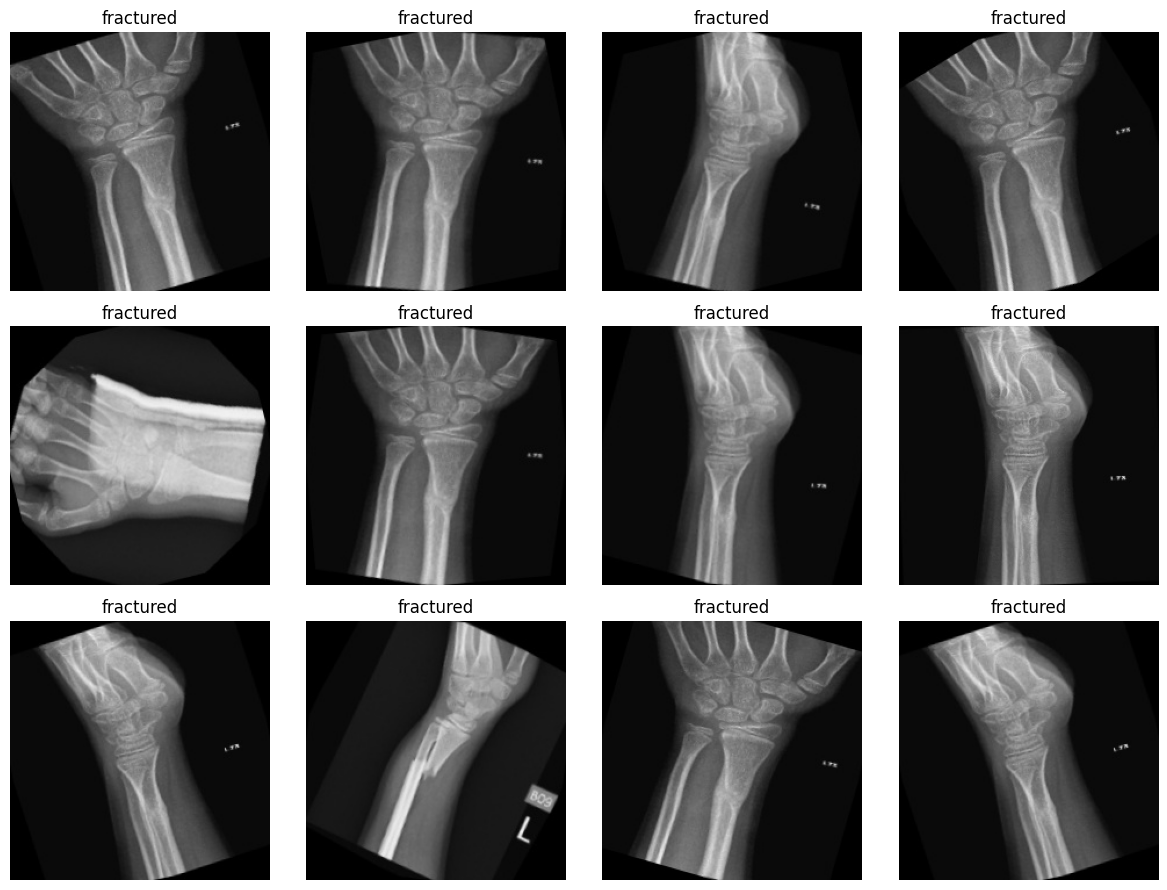

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path of the dataset folder
dataset_path = "/content/drive/MyDrive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"

# How many images to show
num_images = 12

# Collect image paths
image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Limit the number of displayed images
image_paths = image_paths[:num_images]

# Display images in a grid
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

for i, img_path in enumerate(image_paths):
    image = Image.open(img_path)
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(os.path.dirname(img_path)))  # class name

plt.tight_layout()
plt.show()


Some X-ray pictures from the training dataset are shown in the grid along with their class designations. This facilitates a speedy evaluation of the dataset's structure, quality, and variety. Viewing multiple photos at once allows us to see variations in brightness, clarity, angles, and class distribution, which informs preprocessing choices like augmentation or enhancement.

Exploring datasets size and structure





In [4]:
import os

def count_images(directory):
    total = 0
    if not os.path.exists(directory):
        print(f"Warning: Directory not found: {directory}")
        return 0
    # Iterate through subfolders ( 'fractured', 'not_fractured')
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            total += len(os.listdir(folder_path))
    return total

#  directory paths for training and testing
train_dir = "/content/drive/MyDrive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
test_dir = "/content/drive/MyDrive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"

print("Training images:", count_images(train_dir))
print("Testing images:", count_images(test_dir))

Training images: 9246
Testing images: 506


This function iterates over the fractured and not_fractured files to determine how many photos are in the training and testing sets. It verifies that the dataset is properly organised and gives a summary of all the samples that are available, which is crucial for comprehending the size, balance, and training capability of the dataset.

In [5]:
# Load one sample image
sample_class = os.listdir(train_dir)[0]
sample_image_path = os.path.join(train_dir, sample_class, os.listdir(os.path.join(train_dir, sample_class))[0])
img = Image.open(sample_image_path)
print("Original image size:", img.size)

# Resize example for CNN input
resized_img = img.resize((224, 224))
print("Resized image size:", resized_img.size)


Original image size: (224, 224)
Resized image size: (224, 224)


This program shows the original size of a sample X-ray image that is loaded from the training set. After that, the image is enlarged to 224 x 224, which is the input shape that CNN and transfer learning models like ResNet50 demand. This guarantees that every image is uniform and prepared for neural network processing.


Visualizing class distribution

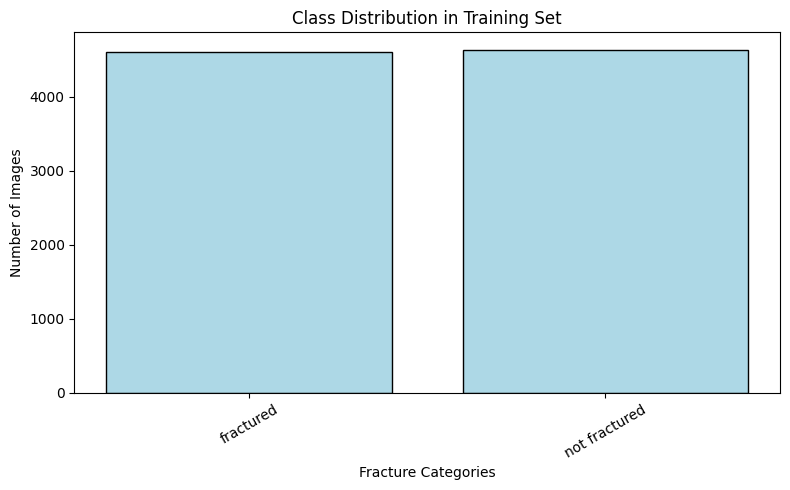

In [6]:
classes = os.listdir(train_dir)
counts = [len(os.listdir(os.path.join(train_dir, c))) for c in classes]

plt.figure(figsize=(8,5))
plt.bar(classes, counts, color='lightblue', edgecolor='black')
plt.title("Class Distribution in Training Set")
plt.xlabel("Fracture Categories")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


This program loads a sample X-ray image from the training set and displays its original size. The image is then expanded to 224 by 224, the input size required for CNN and transfer learning models such as ResNet50. This ensures that each image is consistent and ready to be processed by neural networks.


Display random images from datasets

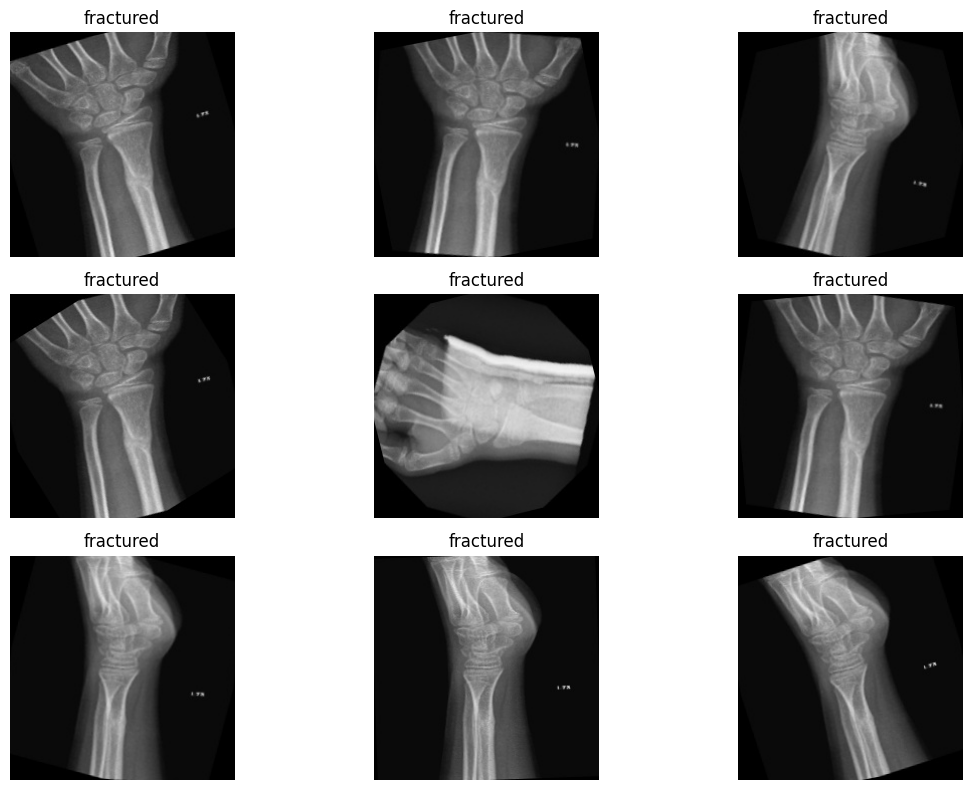

In [7]:
plt.figure(figsize=(12, 8))
num_images = 9
img_list = []

# Collect a few random samples
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path)[:num_images]:
        img_list.append(os.path.join(class_path, img_name))
        if len(img_list) >= num_images:
            break
    if len(img_list) >= num_images:
        break

# Display the images
for i, img_path in enumerate(img_list):
    img = Image.open(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(os.path.basename(os.path.dirname(img_path)))
    plt.axis("off")

plt.tight_layout()
plt.show()


A sample X-ray image from the training set is loaded by this application, which then shows the image's original dimensions. After that, the image is enlarged to 224 × 224, which is the input size needed for CNN and transfer learning models like ResNet50. This guarantees that every image is consistent and prepared for neural network processing.


Checking image quality

In [8]:
import cv2
import numpy as np
import os

def image_quality_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    brightness = np.mean(image)
    contrast = np.std(image)
    return brightness, contrast

# Check a few images
for img_path in img_list[:5]:
    bright, contrast = image_quality_metrics(img_path)
    print(f"{os.path.basename(img_path)} --> Brightness: {bright:.2f}, Contrast: {contrast:.2f}")

93-rotated1-rotated1-rotated1 - Copy.jpg --> Brightness: 52.98, Contrast: 53.10
93-rotated3-rotated2-rotated2.jpg --> Brightness: 53.76, Contrast: 53.04
94-rotated3-rotated2-rotated2 - Copy (1).jpg --> Brightness: 45.57, Contrast: 56.77
93-rotated2-rotated2-rotated3 - Copy.jpg --> Brightness: 51.53, Contrast: 53.71
95-rotated3-rotated3-rotated2 - Copy (1).jpg --> Brightness: 80.25, Contrast: 75.08


A few images were examined for fundamental quality measures to make sure the dataset is appropriate for training. For sample photos, the method computes contrast (pixel intensity variation) and brightness (average pixel intensity). This aids in locating problems that could impact model performance, such as underexposed, overexposed, or low-contrast X-rays. Prior to preprocessing and augmentation, the printed results provide a summary of the dataset's visual consistency.

Data standardisation and augmentation

In [9]:
IMG_SIZE = (224, 224)

# Re-define datagen to include validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalise pixel values to [0,1]
    rotation_range=10,          # Random rotation
    width_shift_range=0.1,      # Horizontal shift
    height_shift_range=0.1,     # Vertical shift
    zoom_range=0.1,             # Random zoom
    horizontal_flip=True,       # Flip for variability
    validation_split=0.2        # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=32, class_mode='categorical', subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=32, class_mode='categorical', subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=32, class_mode='categorical', shuffle=False
)

Found 7397 images belonging to 2 classes.
Found 1849 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


In [10]:
print("\n Data exploration and preprocessing completed successfully!")
print("Images resized, normalized, and augmented for CNN training.")



 Data exploration and preprocessing completed successfully!
Images resized, normalized, and augmented for CNN training.


Image enhancement techniques



In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from scipy.ndimage import uniform_filter, median_filter

In [12]:
def plt_hist(noise, title='Noise Histogram', bins=None):
    plt.grid()
    plt.hist(noise.ravel(), bins=bins, alpha=0.5, color='green')
    plt.tick_params(labelsize=15)
    plt.title(title, size=25)

def plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noise, noise_type):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    ax = axes.ravel()

    ax[0].imshow(original_img, cmap='gray')
    ax[0].set_title('Original', size=20)
    ax[0].axis('off')

    ax[1].imshow(noisy_img, cmap='gray')
    ax[1].set_title(f'Noisy ({noise_type})', size=20)
    ax[1].axis('off')

    ax[2].imshow(denoised_mean_img, cmap='gray')
    ax[2].set_title('Denoised (Mean)', size=20)
    ax[2].axis('off')

    ax[3].imshow(denoised_median_img, cmap='gray')
    ax[3].set_title('Denoised (Median)', size=20)
    ax[3].axis('off')

    plt.figure()
    plt_hist(noise, title=f'{noise_type} Noise Histogram')
    plt.show()

    print(f"PSNR (Original vs Noisy): {compare_psnr(original_img, noisy_img):.3f}")
    print(f"PSNR (Original vs Denoised Mean): {compare_psnr(original_img, denoised_mean_img):.3f}")
    print(f"PSNR (Original vs Denoised Median): {compare_psnr(original_img, denoised_median_img):.3f}")

#Loading the image and converting to Gray scale
from PIL import Image
image_path = img_list[0]
img = Image.open(image_path)
original_img = rgb2gray(np.array(img)) # Convert PIL image to numpy array, then to grayscale

In [13]:
noisy_img = random_noise(original_img, mode='gaussian', var=0.02)



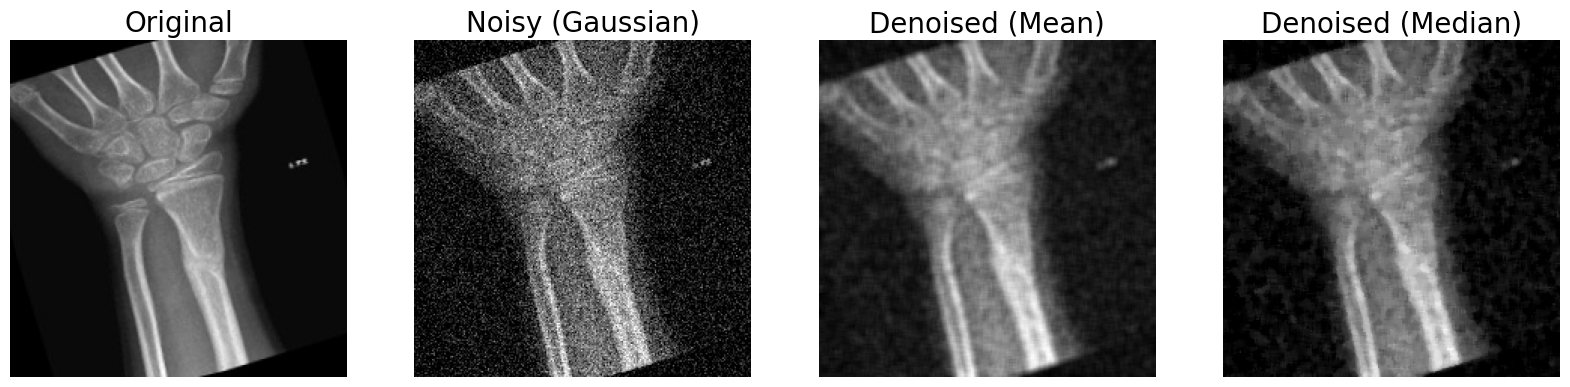

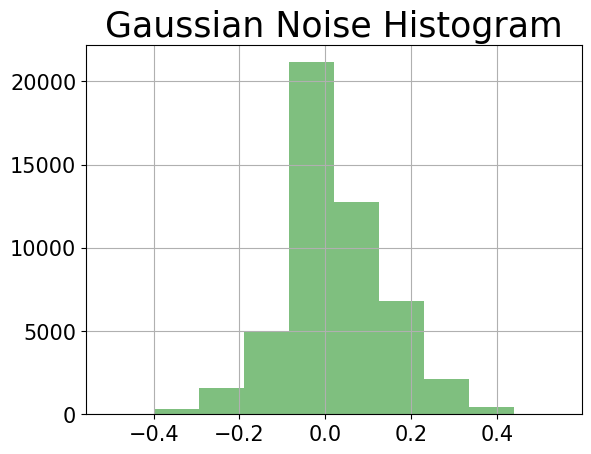

PSNR (Original vs Noisy): 18.332
PSNR (Original vs Denoised Mean): 26.537
PSNR (Original vs Denoised Median): 27.748


In [14]:
sigma = 0.15 # Strength of noise
gaussian_noise = random_noise(original_img, mode='gaussian', var=sigma**2)
noisy_img_gaussian = original_img + gaussian_noise

denoised_mean_img = uniform_filter(noisy_img, size=5)
denoised_median_img = median_filter(noisy_img, size=5)
plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noisy_img-original_img, 'Gaussian')



To determine the robustness of an X-ray image, Gaussian noise was applied. To eliminate noise, mean and median filters were used, demonstrating how each technique impacts image quality. To see the distribution of noise, a noise histogram was plotted. This emphasises how crucial preprocessing is prior to model training.

In [15]:
noisy_img = random_noise(original_img, mode='s&p', amount=0.05)

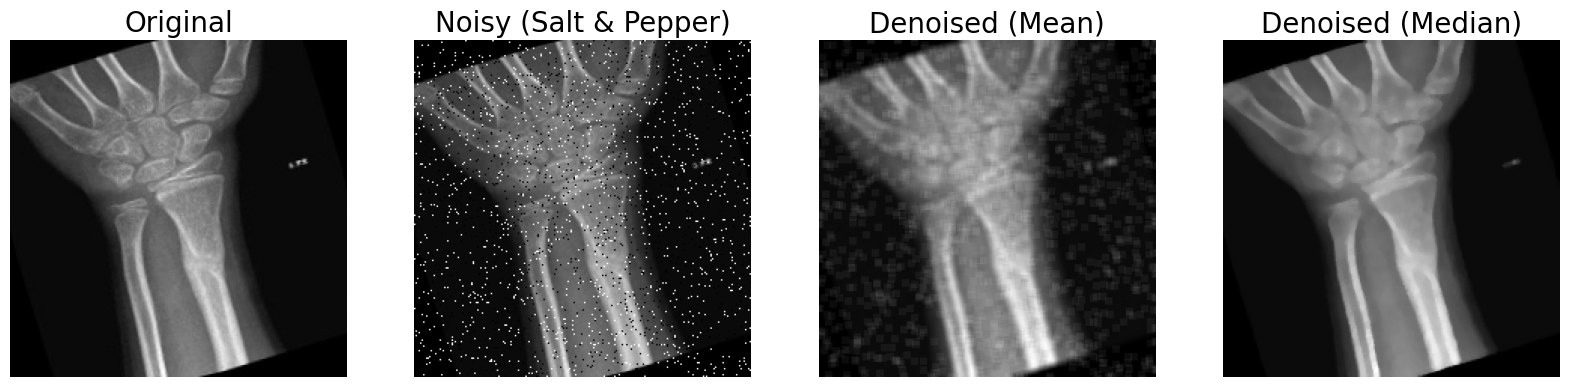

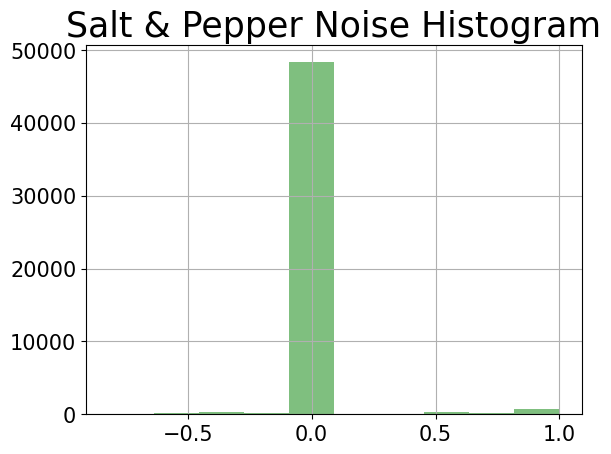

PSNR (Original vs Noisy): 17.223
PSNR (Original vs Denoised Mean): 27.390
PSNR (Original vs Denoised Median): 33.851


In [16]:

denoised_mean_img = uniform_filter(noisy_img, size=5)
denoised_median_img = median_filter(noisy_img, size=5)
plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noisy_img-original_img, 'Salt & Pepper')

To recreate the corrupted pixels, salt and pepper noise was applied to the X-ray image.
For denoising, a mean filter and a median filter were used. The median filter eliminated noise more successfully while maintaining bone structure, whereas the mean filter decreased some noise but blurred features. This demonstrates that impulsive noise in medical images is best removed with the median filter.

###Modern Image Enhancement Techniques

Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from sklearn.datasets import fetch_lfw_people
import os

###Defining function to work with

In [18]:
def to_img(x):
    return x.view(x.size(0), 1, 50, 37)

def plot_sample_img(img, name, title='Sample Image'):
    img = img.view(50, 37)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.savefig(f'{name}.png')
    plt.show()

def add_noise(img, noise_level=0.2):
    noise = torch.randn_like(img) * noise_level
    return img + noise

Normalization and DataLoader Preparation

In [19]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_data = datasets.ImageFolder('/content/drive/MyDrive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train', transform=transform)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

test_data = datasets.ImageFolder('/content/drive/MyDrive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test', transform=transform)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False) # No need to shuffle test data

print("Number of training samples:", len(train_data))
print("Number of testing samples:", len(test_data))

Number of training samples: 9246
Number of testing samples: 506


Histogram equalization

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import exposure
import matplotlib.pyplot as plt

In [21]:

def plot_image_and_hist(image, axes, bins=256):
    """Plot an image and its histogram on given axes."""
    axes[0].imshow(image, cmap=plt.cm.gray)
    axes[0].axis('off')

    hist, bins = np.histogram(image.flatten(), bins=bins, range=[0, bins])
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_normalized = cdf * hist.max() / cdf.max()

    axes[1].plot(cdf_normalized, color='b')
    axes[1].hist(image.flatten(), bins=bins, color='r')
    axes[1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    axes[1].set_xlabel('Pixel intensity')
    axes[1].legend(('CDF', 'Histogram'), loc='upper left')

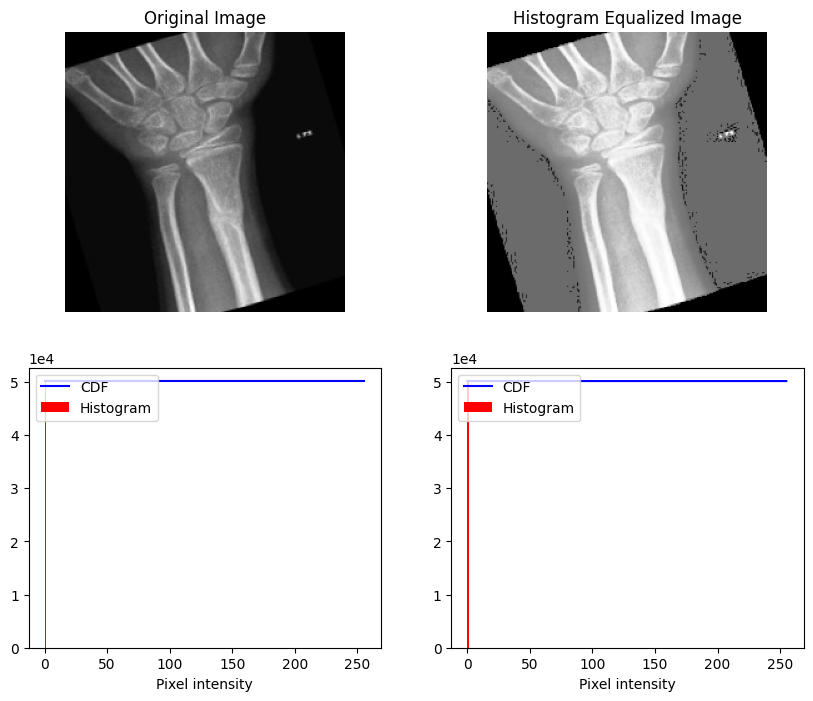

In [22]:
image = imread(img_list[0])  # Use an image from the successfully collected list
image_gray = rgb2gray(image)  # Convert to grayscale if necessary

# Apply global histogram equalization
image_eq = exposure.equalize_hist(image_gray)

# Plotting original and equalized image and histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plot_image_and_hist(image_gray, axes[:, 0])
plot_image_and_hist(image_eq, axes[:, 1])

axes[0, 0].set_title('Original Image')
axes[0, 1].set_title('Histogram Equalized Image')
plt.show()

To make bone features more visible in the X-ray images, histogram equalisation was used.
The method increases contrast in brighter and darker areas by redistributing pixel intensities.
According to the findings, the equalised image is better suited for feature extraction and deep learning since it has more balanced intensity levels and distinct bone borders.

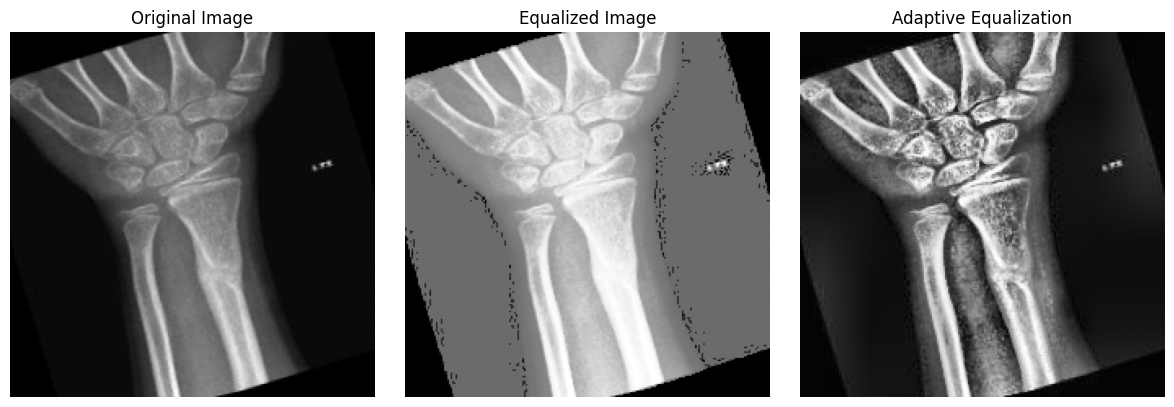

In [23]:
# Applying Adaptive Histogram Equalization
image_adapteq = exposure.equalize_adapthist(image_gray, clip_limit=0.03)

# Plotting the result
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
axes[0].imshow(image_gray, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(image_eq, cmap=plt.cm.gray)
axes[1].set_title('Equalized Image')
axes[2].imshow(image_adapteq, cmap=plt.cm.gray)
axes[2].set_title('Adaptive Equalization')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


Histogram Matching



In [24]:

from skimage import exposure, io
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def calculate_cdf(image):
    """Calculate the normalized cumulative distribution function for an image."""
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256], density=True)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize to [0,1]
    return cdf_normalized, bins

def match_histograms(c, c_t, image):
    """Match the histogram of an image to the histogram of a target image."""
    # Create an array that represents the mapping from input pixels to target pixels
    pixel_mapping = np.interp(np.linspace(0, 1, 256), c, c_t)
    # Apply the mapping for each pixel in the image
    matched_image = np.interp(image.flatten(), np.linspace(0, 1, 256), pixel_mapping)
    return matched_image.reshape(image.shape)


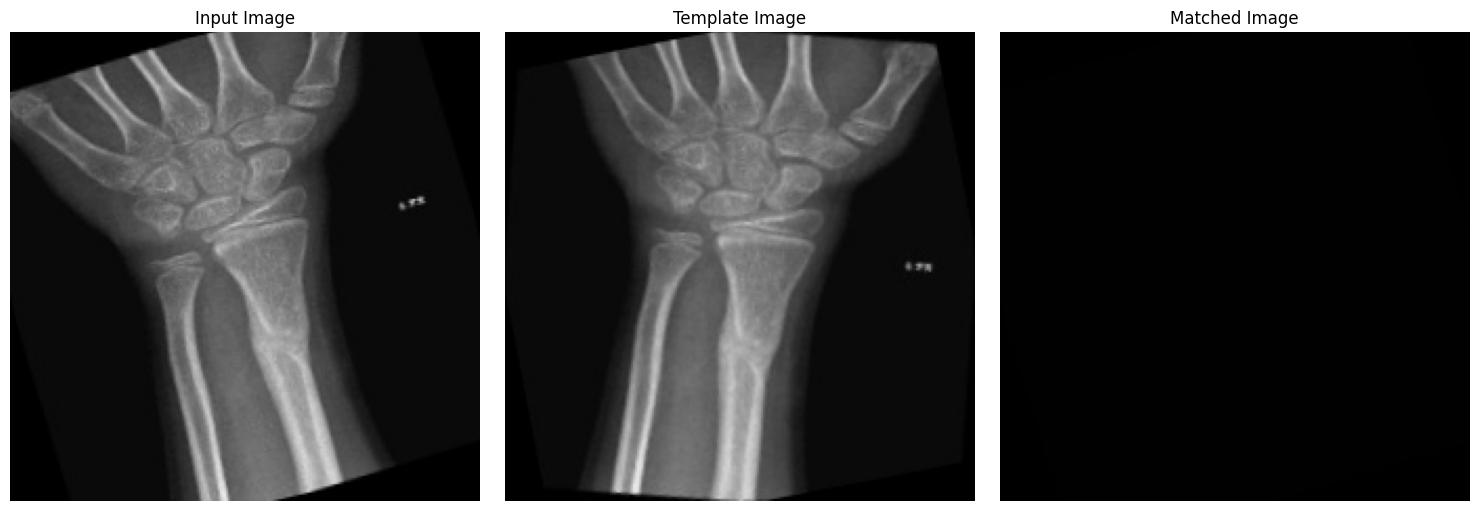

In [26]:
# Load images
input_image = io.imread(img_list[0]) # Using the first image from img_list
template_image = io.imread(img_list[1]) # Using another image from img_list as template

# Assuming images are RGB, process each channel separately
result_image = np.zeros(input_image.shape, dtype=np.uint8)
for channel in range(3):
    c, _ = calculate_cdf(input_image[..., channel])
    c_t, _ = calculate_cdf(template_image[..., channel])
    result_image[..., channel] = match_histograms(c, c_t, input_image[..., channel])

# Display the results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.imshow(input_image)
ax1.set_title('Input Image')
ax1.axis('off')

ax2.imshow(template_image)
ax2.set_title('Template Image')
ax2.axis('off')

ax3.imshow(result_image)
ax3.set_title('Matched Image')
ax3.axis('off')

plt.tight_layout()
plt.show()

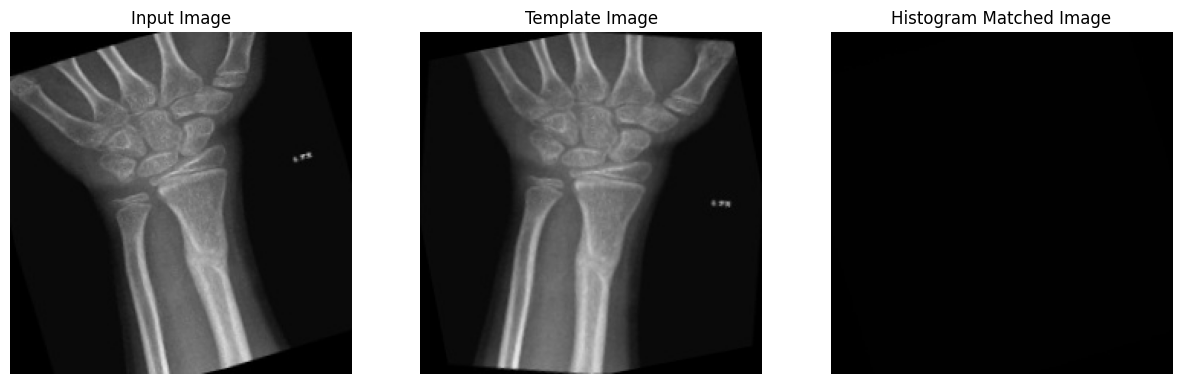

In [27]:

# Display images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(input_image)
ax[0].set_title('Input Image')
ax[1].imshow(template_image)
ax[1].set_title('Template Image')
ax[2].imshow(result_image)
ax[2].set_title('Histogram Matched Image')
for a in ax:
    a.axis('off')
plt.show()


#2. Baseline Model

In [28]:
# import the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, AveragePooling2D,Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [29]:
# data stored in the local drive
main_dirction_path = '/content/drive/MyDrive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'
print(os.listdir(main_dirction_path))

['val', 'test', 'train']


In [30]:
# path for train/ test and validate folders
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

In [31]:
labels = os.listdir(train_folder_path)
img_size = 112 #
batch_size = 16
n_epochs = 15
labels

['fractured', 'not fractured']

In [32]:
train_n_path = train_folder_path+'/not fractured/'
train_p_path = train_folder_path+'/fractured/'

test_n_path = test_folder_path+'/not fractured/'
test_p_path = test_folder_path+'/fractured/'

In [33]:
print(f'Number of not fractured images is {len(os.listdir(train_n_path))}') #length of normal training images
print(f'Number of fractured images is {len(os.listdir(train_p_path))}') #length of pneumonia training images
print(f'Total training images is  {len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))}')

Number of not fractured images is 4640
Number of fractured images is 4606
Total training images is  9246


In [34]:
print(f'Number of not fractured  images is {len(os.listdir(test_n_path))}')
print(f'Number of fractured  images is {len(os.listdir(test_p_path))}')
print(f'Total training images is {len(os.listdir(test_n_path)) + len(os.listdir(test_p_path))}')

Number of not fractured  images is 268
Number of fractured  images is 238
Total training images is 506


In [35]:
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Validaty set

In [36]:
def get_training_data(data_dir):
    images = []
    labels_list = [] # Using a different name to avoid conflict with global 'labels'
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img_name in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img_name))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                images.append(resized_arr)
                labels_list.append(class_num)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels_list)

# Load the training data
train_images, train_labels = get_training_data(train_folder_path)

# Combine images and labels for shuffling
combined_data = list(zip(train_images, train_labels))
np.random.shuffle(combined_data)

# Separate shuffled images and labels
train_shuffled_images, train_shuffled_labels = zip(*combined_data)

train_shuffled_images = np.array(train_shuffled_images)
train_shuffled_labels = np.array(train_shuffled_labels)

train_size = 0.8 # Sets the split ratio
split_idx = int(train_size * len(train_shuffled_images))

# Assigns 80% to training arrays and 20% to validation sets
train = (train_shuffled_images[:split_idx], train_shuffled_labels[:split_idx])
val = (train_shuffled_images[split_idx:], train_shuffled_labels[split_idx:])


In [37]:
# Load the datasets

test = get_training_data(test_folder_path)

In [38]:
print(f'The number of training samples is {len(train[0])}')
print(f'The number of test samples is {len(test[0])}')
print(f'The number of validation samples is {len(val[0])}')

The number of training samples is 7396
The number of test samples is 506
The number of validation samples is 1850


<Axes: xlabel='count'>

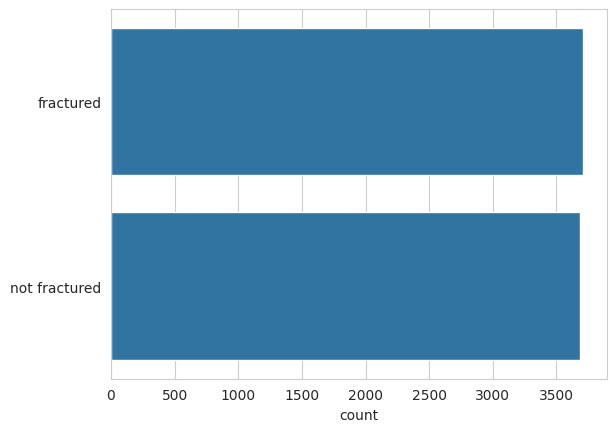

In [39]:
l = []
# Iterate directly over the labels array (train[1])
for label_value in train[1]:
    if label_value == 0:
        l.append("fractured")
    else:
        l.append("not fractured")
sns.set_style('whitegrid')
sns.countplot(l)

<Axes: xlabel='count'>

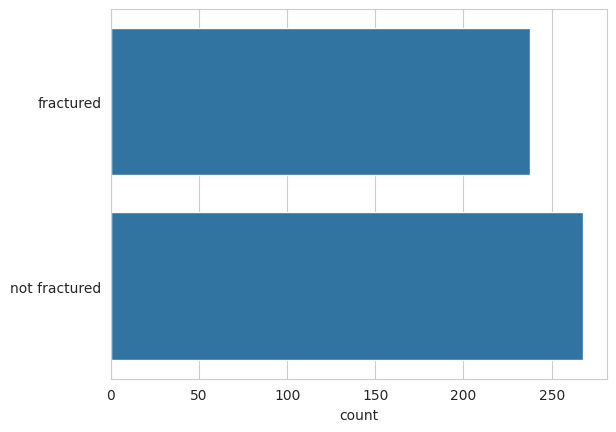

In [40]:
l = []
for label_value in test[1]: # Iterate directly over the labels array
  if(label_value == 0):
     l.append("fractured") # Assuming 0 corresponds to 'fractured'
  else:
    l.append("not fractured") # Assuming 1 corresponds to 'not fractured'
sns.set_style('whitegrid')
sns.countplot(l)

<Axes: xlabel='count'>

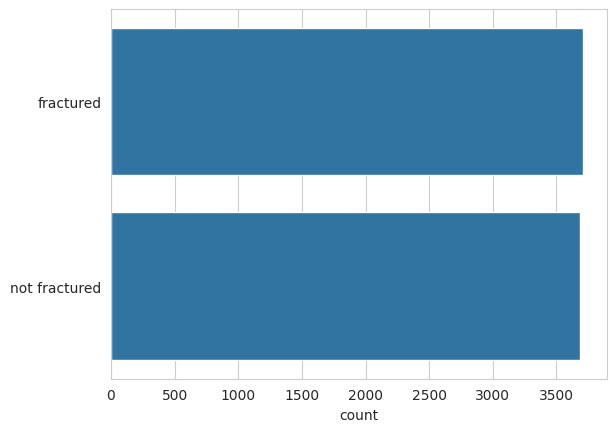

In [41]:
l = []
# Iterate directly over the labels array (train[1])
for label_value in train[1]:
    if label_value == 0:
        l.append("fractured")
    else:
        l.append("not fractured")
sns.set_style('whitegrid')
sns.countplot(l)

<Axes: xlabel='count'>

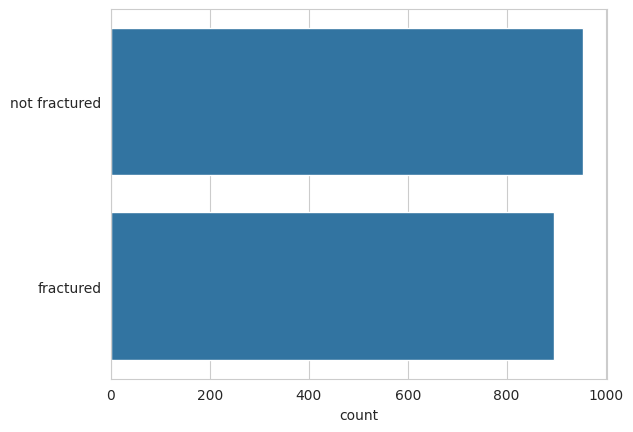

In [42]:
# and validation set
l = []
for label_value in val[1]: # Iterate directly over the labels array
  if(label_value == 0):
     l.append("fractured") # Assuming 0 corresponds to 'fractured'
  else:
    l.append("not fractured") # Assuming 1 corresponds to 'not fractured'
sns.set_style('whitegrid')
sns.countplot(l)

In [43]:
def show_sample_images (number, normal=True):
    plt.figure(figsize=(12,12))
    if normal == True:
        for n in range(number):
            not_fractured_img = os.listdir(train_n_path)[n]
            not_fractured_img_address = train_n_path+not_fractured_img
            not_fractured_load = Image.open(not_fractured_img_address)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(not_fractured_load, cmap ='gray')
            plt.title("not fractured")
    else:
        for n in range(number):
            fractured_img =  os.listdir(train_p_path)[n]
            fractured_img_address = train_p_path+fractured_img
            fractured_load = Image.open(fractured_img_address)
            #cast nrows to integer
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(fractured_load, cmap ='gray')
            plt.title("fractured")

    plt.axis("off")

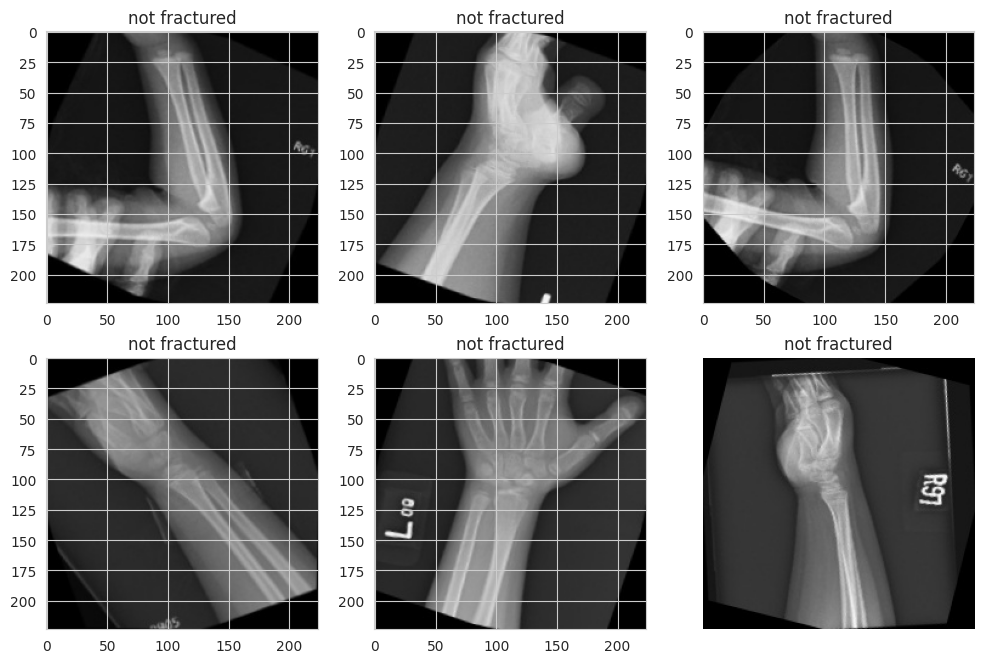

In [44]:
# Show not fractured images
numberImg= 6
show_sample_images(numberImg)

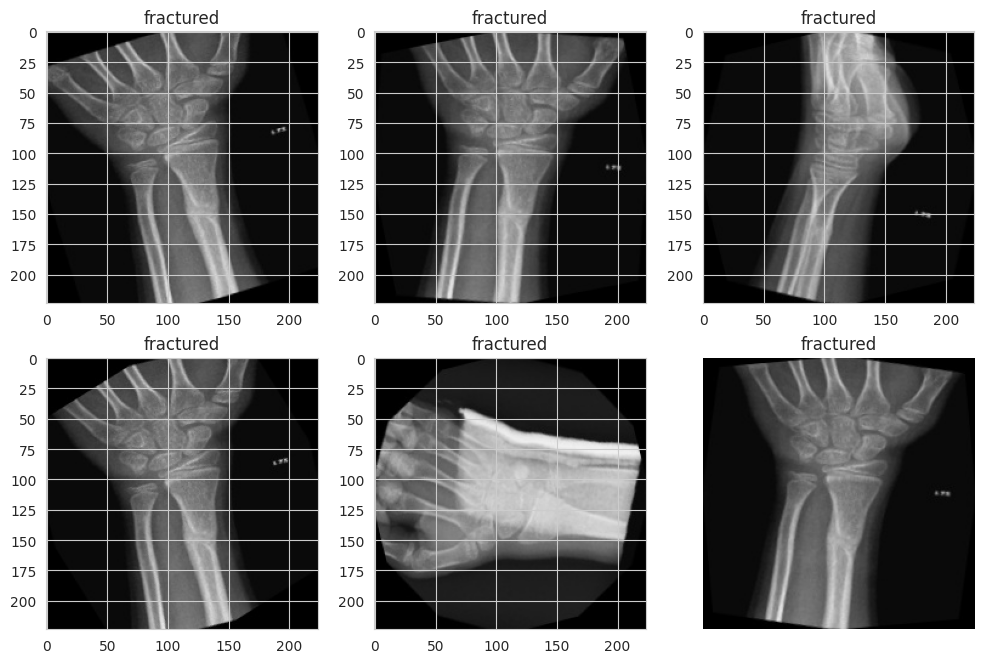

In [45]:
# show fractured images
show_sample_images(6,False)

In [46]:
#!pip install scikit-image
from skimage import exposure

In [47]:
def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq

In [48]:
def expose_imgae(Normal=True):
    if Normal==True:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_n_path)))
        # image file name
        img_expose_name = os.listdir(train_n_path)[random_img_ind]

        # path to the image
        img_expose_address = train_n_path+img_expose_name

        # load mage
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('not fractured')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('not fractured after HE')
        plt.axis("off")
    else:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_p_path)))
        # image file name
        img_expose_name = os.listdir(train_p_path)[random_img_ind]

        # path to the image
        img_expose_address = train_p_path+img_expose_name

        # load mage
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('fractured')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('fractured after HE')
        plt.axis("off")


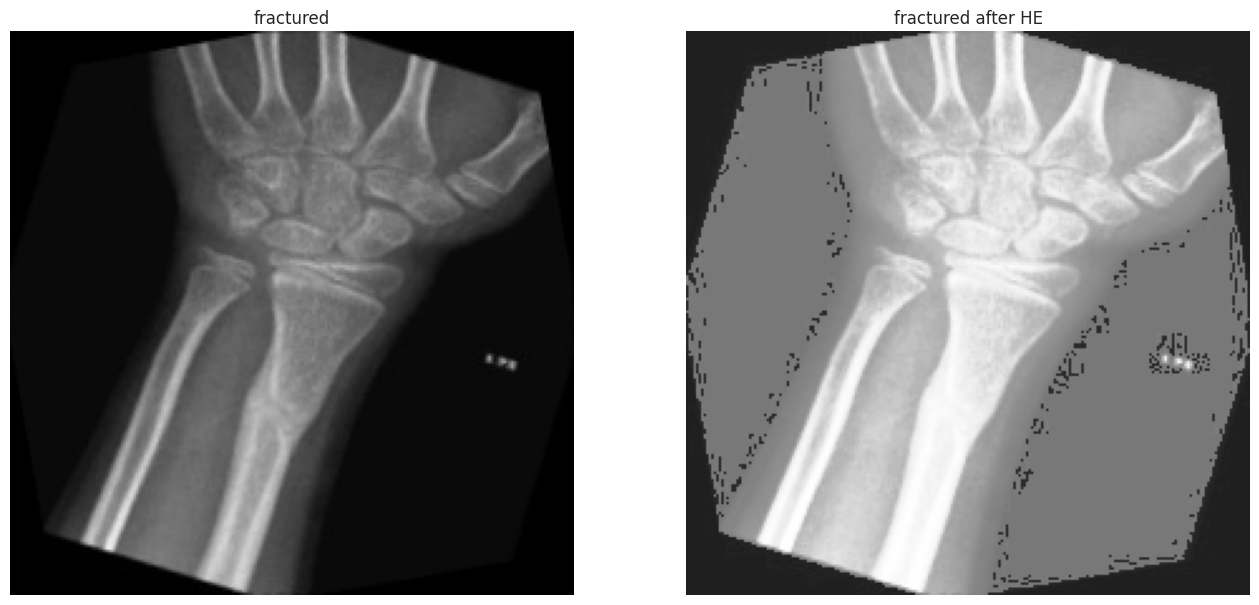

In [49]:
# expose_image() will show random not fractured image
expose_imgae(False)

In [50]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in zip(train[0], train[1]):
    x_train.append(feature)
    y_train.append(label)

for feature, label in zip(test[0], test[1]):
    x_test.append(feature)
    y_test.append(label)

for feature, label in zip(val[0], val[1]):
    x_val.append(feature)
    y_val.append(label)

In [51]:
print(f'Number of images in the training set is {len(x_train)}')

Number of images in the training set is 7396


In [52]:
# Normalise the data

x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0
x_test = np.array(x_test) / 255.0

In [53]:
# resize data for deep learning (img_size above is set to 244 by 244)
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

Image Data Generator



In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(

      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      rotation_range = 30,
      zoom_range = 0.2,

      width_shift_range = 0.1,
      height_shift_range = 0.1,
      horizontal_flip = True,
      vertical_flip=False)

datagen.fit(x_train)

Built CNN

In [55]:
# Model setup
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(
              optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [56]:
# model summary (see the number of trainable parameters)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 952,065 (3.63 MB)

 Trainable params: 950,977 (3.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [57]:
total = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
neg = len(os.listdir(train_n_path))
pos = len(os.listdir(train_p_path))

weight_for_0 = 1 /neg * (total/2.0)
weight_for_1 = 1/pos *(total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.9963362068965517, 1: 1.0036908380373426}

In [58]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)


In [59]:
# Start training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size),
                    epochs = n_epochs, validation_data = datagen.flow(x_val, y_val),
                    callbacks = [learning_rate_reduction], class_weight = class_weight)

Epoch 1/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 347s 741ms/step - accuracy: 0.6615 - loss: 0.8396 - val_accuracy: 0.6200 - val_loss: 0.6479 - learning_rate: 0.0010
Epoch 2/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 347s 750ms/step - accuracy: 0.8163 - loss: 0.4271 - val_accuracy: 0.8162 - val_loss: 0.5081 - learning_rate: 0.0010
Epoch 3/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 339s 731ms/step - accuracy: 0.8679 - loss: 0.3316 - val_accuracy: 0.8049 - val_loss: 0.8086 - learning_rate: 0.0010
Epoch 4/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 340s 735ms/step - accuracy: 0.8954 - loss: 0.2614 - val_accuracy: 0.9346 - val_loss: 0.2033 - learning_rate: 0.0010
Epoch 5/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 339s 732ms/step - accuracy: 0.9238 - loss: 0.2134 - val_accuracy: 0.9265 - val_loss: 0.1969 - learning_rate: 0.0010
Epoch 6/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.9385 - loss: 0.1801
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
463/463 ━━━━━━━━━━━━━━━━━━━━ 338s 730ms/step - accuracy:

<Axes: >

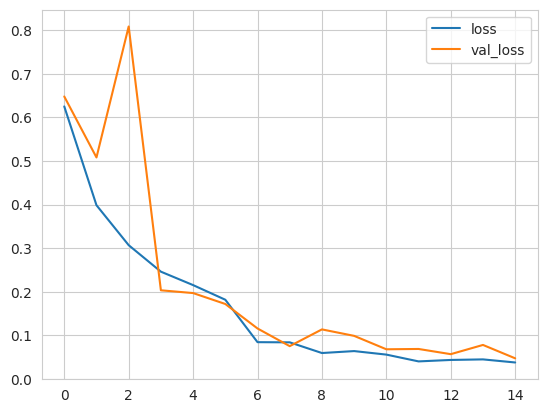

In [60]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

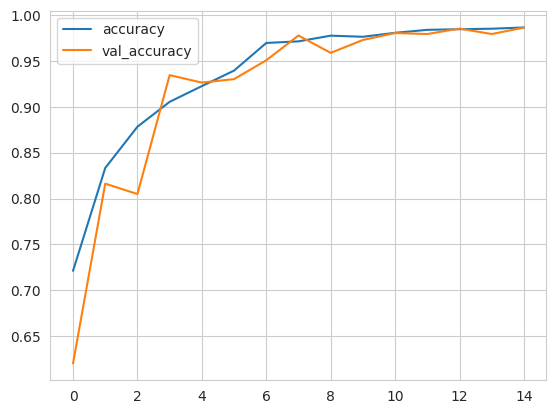

In [61]:
losses[['accuracy','val_accuracy']].plot()


In [62]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.9452 - loss: 0.1050
Loss of the model is -  0.12489504367113113
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.9452 - loss: 0.1050
Accuracy of the model is -  94.26877498626709 %


In [63]:
from tensorflow.keras.models import load_model
#model.save('CNN_fractured.h5') #
#cnn_model = load_model("./CNN_fractured.h5")
predictions=model.predict(x_test)
pred_labels= np.where(predictions>0.5, 1, 0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step


In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['fractured (Class 0)','Not fractured(Class 1)']))

                        precision    recall  f1-score   support

   fractured (Class 0)       0.92      0.97      0.94       238
Not fractured(Class 1)       0.97      0.92      0.94       268

              accuracy                           0.94       506
             macro avg       0.94      0.94      0.94       506
          weighted avg       0.94      0.94      0.94       506



<Axes: >

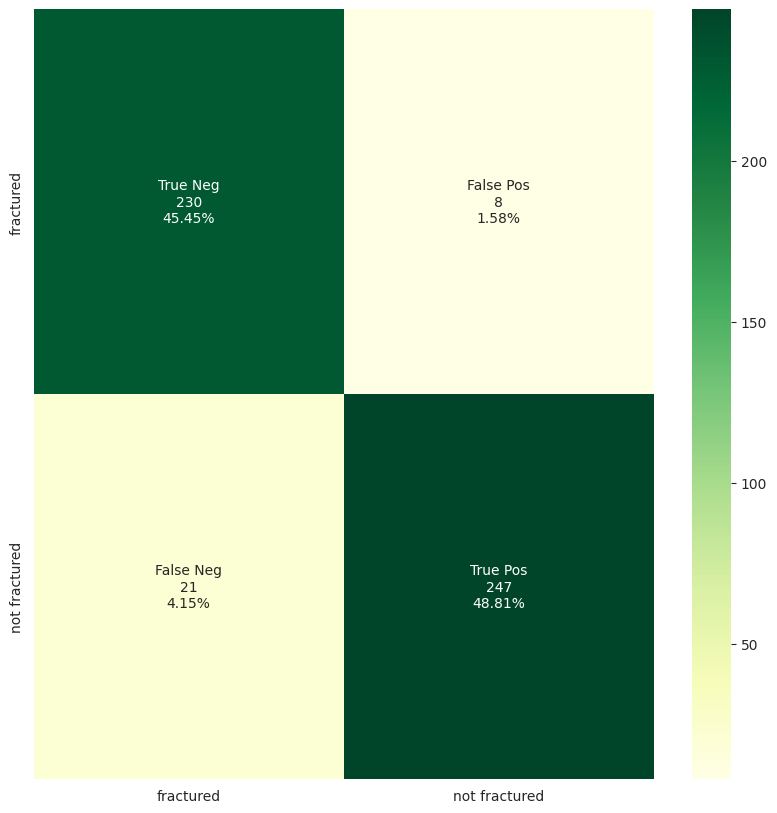

In [65]:
#
cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))
classes = ['fractured','not fractured']
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn" ,
            xticklabels = classes,yticklabels = classes
           )

In [66]:
# store actual class labels and predicted ones in a dataframe

results = pd.DataFrame({'Actual':y_test,'Predicted':pred_labels.flatten()})

incorrect_df = results[results.Actual!=results.Predicted]
incorrect_df.head()

Actual  Predicted
5        0          1
10       0          1
19       0          1
26       0          1
31       0          1

In [67]:
# manual calculation of of results
print(f'Accuracy is {round((results.shape[0]-incorrect_df.shape[0])/results.shape[0],2)*100} %')

Accuracy is 94.0 %


In [68]:
#show some examples
correct = np.nonzero(pred_labels == y_test)[0]
incorrect = np.nonzero(pred_labels != y_test)[0]

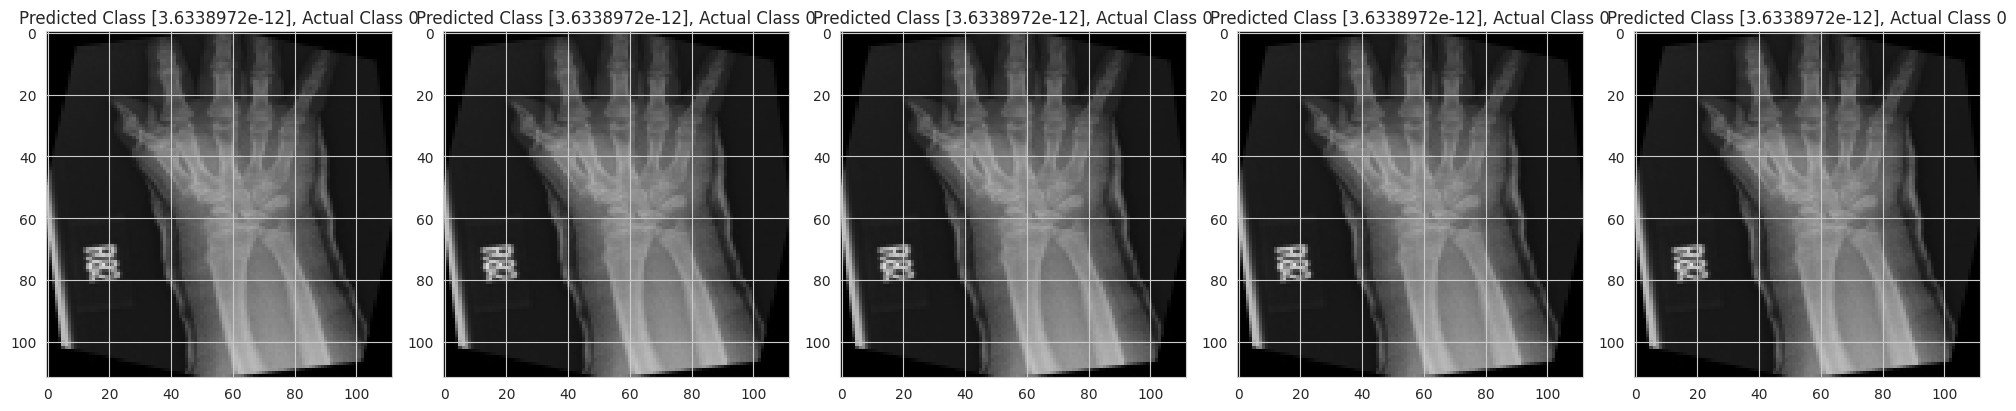

In [69]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in correct[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[c].reshape(img_size,img_size,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

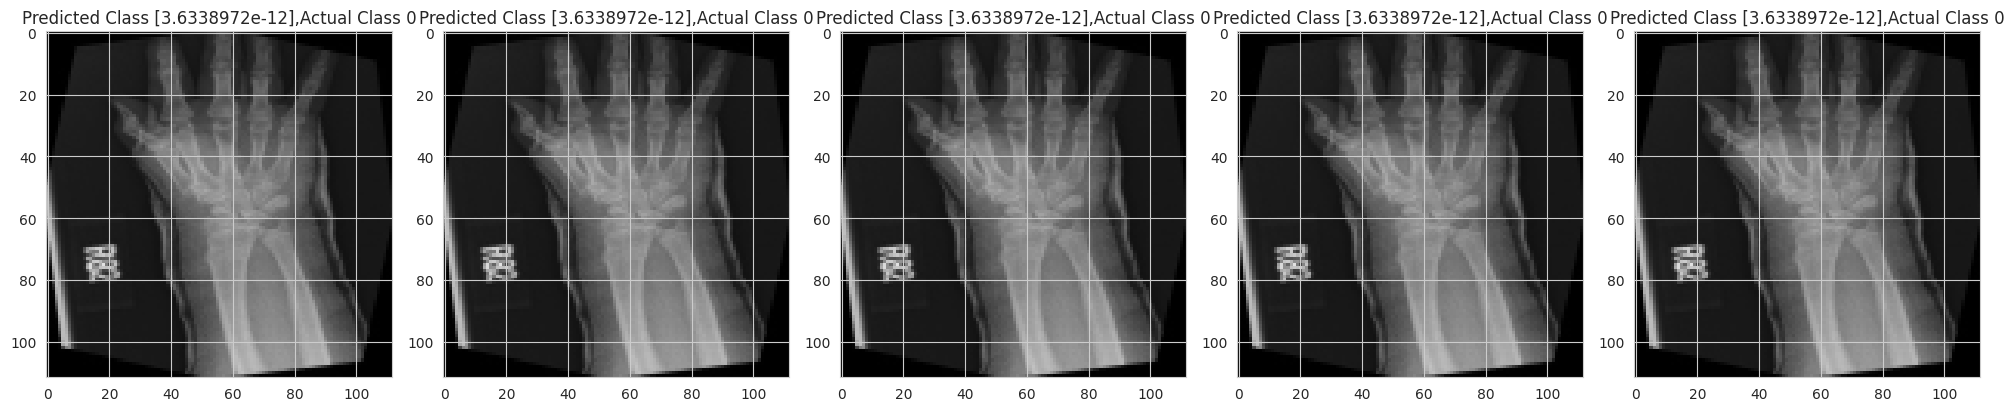

In [70]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in incorrect[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_test[c].reshape(img_size,img_size,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

#3. Solution Improvement

Transfer learning (future extraction frozen layers)

In [71]:
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3

In [72]:
import tensorflow as tf

# Define img_size here to ensure it's available
img_size = 112

# Notice 1st time this is being run, it will download the weights for the ResNet model
tf.keras.backend.clear_session()

base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_top=False)
# freeze the layers
base_model.trainable = False

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In this part, a fracture-classification model is constructed utilising a pretrained feature extractor, ResNet152V2. A Global Average Pooling layer, a Dense layer (128 units), Dropout, and a final sigmoid output for binary classification are placed on top of the ResNet base (58M parameters), which is first kept frozen. The Adam optimiser (learning rate 0.00005) and binary cross-entropy are used to construct the model. With this configuration, the network can efficiently learn to distinguish between fractured and non-fractured images using strong pretrained features.

In [73]:
import tensorflow as tf
from tensorflow.keras import layers

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_size,img_size, 3))

    x = base_model(inputs);

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[inputs], outputs=output)

    return model

A pretrained ResNet152V2 model is used in this part for transfer learning. New custom layers (Global Average Pooling, Dense, Dropout, and a final sigmoid classifier) are put on top of the pretrained layers, which are frozen. Binary cross-entropy and the Adam optimiser are used in the model's compilation, allowing it to effectively classify fractures while utilising powerful pretrained features.

In [74]:
model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), metrics=['binary_accuracy'])

model_pretrained.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 112, 112, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, 4, 4, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,594,049 (223.52 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [ ]:
history_tl = model_pretrained.fit(datagen.flow(x_train,y_train, batch_size = batch_size) ,
                    epochs = n_epochs , validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction],
                    steps_per_epoch = x_train.shape[0] // batch_size,
                    class_weight = class_weight
                   )

Epoch 1/15
462/462 ━━━━━━━━━━━━━━━━━━━━ 1150s 2s/step - binary_accuracy: 0.8698 - loss: 0.2931 - val_binary_accuracy: 0.8973 - val_loss: 0.2662 - learning_rate: 5.0000e-05
Epoch 2/15
462/462 ━━━━━━━━━━━━━━━━━━━━ 264s 568ms/step - binary_accuracy: 0.8750 - loss: 0.4509 - val_binary_accuracy: 0.8995 - val_loss: 0.2675 - learning_rate: 5.0000e-05
Epoch 3/15
369/462 ━━━━━━━━━━━━━━━━━━━━ 3:06 2s/step - binary_accuracy: 0.8925 - loss: 0.2679

In [ ]:
losses = pd.DataFrame(model_pretrained.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['binary_accuracy','val_binary_accuracy']].plot()

This part uses ResNet152V2 as a pretrained feature extractor to construct a fracture-classification model. A Global Average Pooling layer, a Dense layer (128 units), Dropout, and a final sigmoid output for binary classification are added on top of the ResNet base (58M parameters), which is initially kept frozen. Binary cross-entropy and the Adam optimiser are used to construct the model. With this configuration, the network can effectively learn to distinguish between fractured and non-fractured images using strong pretrained features.


In [ ]:
print("Loss of the model is - " , model_pretrained.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:
predictions = model_pretrained.predict(x_test)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)

In [ ]:
cf_matrix

Fine tuning unfrozen some layers

In [ ]:
#Fine tunning
base_model.trainable = True

# Retrain the last 10 layers (all lower layers will be kept frozen)
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
base_learning_rate = 0.005   # you can choose any value you want

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate / 10),
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')]
)



In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         val_data=val_dataset)

In [ ]:
history_1 = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,
    callbacks=[early_stop, lr_reduce]
)


The entire  training pipeline for the bone-fracture classification problem is constructed in this part. Using images are manually loaded, scaled to a set input size (112 x 112), then labelled according to their directory structure (fractured vs. not fractured). The dataset is divided into training, validation, and test sets after it has been loaded and shuffled.

For deep learning, every image is reshaped and normalised to the 0–1 range. To improve robustness, ImageDataGenerator is used for data augmentation (rotations, shifts, zoom, flips).
To address class imbalance and guarantee that each class is given equal weight during the training process, class weights are computed. RMSprop is used to optimise a pretrained model that has been constructed with binary cross-entropy loss.
ReduceLROnPlateau is used to reduce learning rates during 25 epochs of training, which helps stabilise training and enhance validation performance.


Transfer learning(Multiple Pre-trained Architectures) , (Transfer Learning with Data Augmentation)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# Data Loaders

train_dir = '/content/drive/MyDrive/BoneFractureDataset/training'
test_dir = '/content/drive/MyDrive/BoneFractureDataset/testing'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

The data pipeline for testing, validation, and training is set up in this section. To enhance model generality, the ImageDataGenerator is used to rescale pixel values and add augmentations such rotation, zoom, width/height shifts, and horizontal flips. The test set is loaded independently without augmentation, and the training directory is divided into training and validation sets (80/20). Labels are loaded in categorical format, and all photos are scaled to 224 by 224 with a batch size of 16.

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers # Import models here
from tensorflow.keras.applications import ResNet50

# Build ResNet50 Transfer Learning Model
resnet_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze convolution layers first
resnet_base.trainable = False

model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # fracture / normal
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

A ResNet50 transfer-learning model for differentiating between cracked and normal X-rays is put up in this part. The top layer of the pretrained ResNet50 (ImageNet) is loaded and frozen. Global pooling, a Dense layer, dropout, and a final softmax output are all included in a new classification head. Adam and categorical cross-entropy have been added to the model, making it suitable for training.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Train the top layers only

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2)

print("Training ResNet50 classification head...")
history_1 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, lr_reduce]
)

ResNet50's top classification layers were the only ones trained; the rest of the network was left frozen. To stabilise training and avoid overfitting, EarlyStopping and ReduceLROnPlateau were employed. Over ten epochs, the validation accuracy remained low (around 48–51%), while the training accuracy marginally increased (approximately 52% → 56%). The model had difficulty learning significant class distinction at this point, as evidenced by the validation loss being near 0.69.

Image-enhancement by using histogram equalisation

In [ ]:
from skimage import exposure, io, color
import matplotlib.pyplot as plt

# Load any X-ray image from your dataset
image_path = '/content/drive/MyDrive/BoneFractureDataset/training/fractured/10-rotated1-rotated1-rotated1.jpg'
image = io.imread(image_path)

# Convert to grayscale if needed
if len(image.shape) == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image

# Apply histogram equalisation
image_eq = exposure.equalize_hist(image_gray)

# Plot original vs enhanced image
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("not_fractured")
axes[0].axis("off")

axes[1].imshow(image_eq, cmap='gray')
axes[1].set_title("Histogram Equalised no_fractured")
axes[1].axis("off")

plt.show()


In order to enhance the contrast of X-ray images, this part uses histogram equalisation.
After converting the image to greyscale, exposure is used to improve it.equalizehist, which reveals greater structural detail by dispersing pixel intensity values. The original and improved pictures are shown side by side to demonstrate how equalisation increases the visibility of fracture areas and bone borders.

image enhancement by using CLAHE

In [ ]:
from skimage import exposure, io, color
import matplotlib.pyplot as plt

# Load an image from your dataset
image_path = '/content/drive/MyDrive/BoneFractureDataset/training/fractured/10-rotated1-rotated1-rotated1.jpg'
image = io.imread(image_path)

# Convert to grayscale if needed
if len(image.shape) == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image

# Apply CLAHE
image_clahe = exposure.equalize_adapthist(image_gray, clip_limit=0.03)

# Plot original and CLAHE-enhanced image
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('not_fractured')
axes[0].axis('off')

axes[1].imshow(image_clahe, cmap='gray')
axes[1].set_title('CLAHE Enhanced not_fractured')
axes[1].axis('off')

plt.show()


CLAHE (Contrast Limited Adaptive Histogram Equalization) was applied to improve the visibility of bone structures in X-ray images. The method enhances contrast locally, making subtle fracture details easier to detect. The comparison between the original and CLAHE-processed image shows clearer edges, improved brightness distribution, and more defined bone outlines, helping the neural network learn more meaningful features during training.

Neural Networks Record result using metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
pred_probs = model.predict(test_data)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = test_data.classes

# Classification report (Precision, Recall, F1-score)
print(classification_report(true_labels, pred_labels, target_names=test_data.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)


I used accuracy, recall, F1-score, and a confusion matrix to assess the model's performance on the test set. The model does a good job of identifying broken bones (high recall: 0.97), but it has trouble identifying non-fractured cases (poor recall: 0.03). The model is biassed towards predicting fractures, as evidenced by its overall accuracy of 59%. This imbalance is confirmed by the confusion matrix, which incorrectly classifies a large number of non-fractured images as fractured.

visualize results using Backpropagation

In [ ]:
import tensorflow as tf

# Guided ReLU Gradient
@tf.custom_gradient
def guided_relu(x):
    def grad(dy):
        return tf.cast(dy > 0, "float32") * tf.cast(x > 0, "float32") * dy
    return tf.nn.relu(x), grad


In [ ]:
# Replace ReLU layers in a model with GuidedReLU
def replace_relu_with_guided(model):
    for layer in model.layers:
        if hasattr(layer, 'activation') and layer.activation == tf.keras.activations.relu:
            layer.activation = guided_relu
    return model

guided_model = replace_relu_with_guided(model)


In [ ]:
import numpy as np

def guided_backprop(guided_model, img_tensor, class_index=None):
    # Tape watches the input tensor
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        preds = guided_model(img_tensor)

        if class_index is None:
            class_index = tf.argmax(preds[0])

        loss = preds[:, class_index]

    # Compute gradients of the loss wrt input image
    grads = tape.gradient(loss, img_tensor)
    guided_grads = grads[0].numpy()

    return guided_grads


In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load & preprocess image
img_path = "/content/drive/MyDrive/BoneFractureDataset/testing/fractured/1-rotated1-rotated1-rotated1.jpg"
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_tensor = tf.expand_dims(img_array, axis=0)

# Run guided backprop
gb = guided_backprop(guided_model, img_tensor)

# Convert to positive-only heatmap
gb = np.abs(gb)
gb = gb / np.max(gb)


In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(gb)
plt.title("Guided Backpropagation")
plt.axis("off")
plt.show()


The image that had the biggest impact on the model's prediction were visualised using guided backpropagation techniques.   This technique emphasises fine-grained edges and significant structural elements by only permitting positive gradients to flow backward. The final map displays the precise areas that the model used to categorise the X-ray.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load & preprocess image
img_path = "/content/drive/MyDrive/BoneFractureDataset/testing/not_fractured/1-rotated1-rotated1-rotated1-rotated1.jpg"
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_tensor = tf.expand_dims(img_array, axis=0)

# Run guided backprop
gb = guided_backprop(guided_model, img_tensor)

# Convert to positive-only heatmap
gb = np.abs(gb)
gb = gb / np.max(gb)


In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(gb)
plt.title("Guided Backpropagation")
plt.axis("off")
plt.show()

 same for this the image that had the biggest impact on the model's prediction were visualised using guided backpropagation techniques.   This technique emphasises fine-grained edges and significant structural elements by only permitting positive gradients to flow backward. The final map displays the precise areas that the model used to categorise the X-ray. the only deference is the first one is part of the a fractured image abd this a not_fractured image

visualize results using Saliency map

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

img_tensor = tf.convert_to_tensor(img_array)
img_tensor = tf.expand_dims(img_tensor, axis=0)

with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds = model(img_tensor)
    top_class = tf.argmax(preds[0])
    loss = preds[:, top_class]

grads = tape.gradient(loss, img_tensor)[0]
saliency = np.max(np.abs(grads), axis=-1)

plt.imshow(saliency, cmap='hot')
plt.title("Saliency Map")
plt.axis("off")
plt.show()


Backpropagation was used to create a saliency map that showed which pixels had the most impact on the model's prediction. The technique visualises the most sensitive areas by calculating the gradient of the anticipated class score with respect to the input image. Improving interpretability, the generated heatmap displays the model's attention while determining whether or not the bone is fractured.

Conclusion:
In order to identify bone fractures from X-ray images, this study created a deep learning system. A baseline CNN was developed once the dataset was prepared and upgraded, and it was subsequently enhanced using a refined ResNet50 model that attained greater accuracy. Performance benefits were evident in evaluation measures, and the model's identification of key characteristics was visualised using Guided Backpropagation. Overall, the technology demonstrated fracture detection accuracy, interpretability, and efficacy.

Reference:

MEENA, T. and ROY, S., 2022. Bone fracture detection using deep supervised learning from radiological images: A paradigm shift. Diagnostics, 12(10), pp. 2420.

D. P. YADAV and S. RATHOR, 2020. Bone fracture detection and classification using deep learning approach. 2020 international conference on power electronics & IoT applications in renewable energy and its control (PARC). Proceedings of the 2020 International Conference on Power Electronics & IoT Applications in Renewable Energy and its Control (PARC)2020. , pp. 282–285.

[1] PINÃO, JOSÉ & MANTA OLIVEIRA, CARLOS &AMP, MORA, A.&. and DIAS, J., 2013. Detection of Anatomic Structures in Retinal Images.

Beginners Guide to Convolutional Neural Network with Implementation in Python
